In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kaggle-survey-2021/kaggle_survey_2021_responses.csv
/kaggle/input/kaggle-survey-2021/supplementary_data/kaggle_survey_2021_methodology.pdf
/kaggle/input/kaggle-survey-2021/supplementary_data/kaggle_survey_2021_answer_choices.pdf


In [2]:
data=pd.read_csv('../input/kaggle-survey-2021/kaggle_survey_2021_responses.csv',usecols= ['Q1','Q2','Q3','Q4','Q5','Q6','Q20','Q21','Q22',
                                      'Q25','Time from Start to Finish (seconds)'])


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25974 entries, 0 to 25973
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Time from Start to Finish (seconds)  25974 non-null  object
 1   Q1                                   25974 non-null  object
 2   Q2                                   25974 non-null  object
 3   Q3                                   25974 non-null  object
 4   Q4                                   25974 non-null  object
 5   Q5                                   25974 non-null  object
 6   Q6                                   25974 non-null  object
 7   Q20                                  16326 non-null  object
 8   Q21                                  16252 non-null  object
 9   Q22                                  16127 non-null  object
 10  Q25                                  15392 non-null  object
dtypes: object(11)
memory usage: 2.2+ MB


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q20,Q21,Q22,Q25
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,In what industry is your current employer/cont...,What is the size of the company where you are ...,Approximately how many individuals are respons...,What is your current yearly compensation (appr...
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,"25,000-29,999"
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Manufacturing/Fabrication,"1000-9,999 employees",1-2,"60,000-69,999"
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Academics/Education,"1000-9,999 employees",0,$0-999
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Academics/Education,"1000-9,999 employees",0,"30,000-39,999"
...,...,...,...,...,...,...,...,...,...,...,...
25969,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Computers/Technology,"10,000 or more employees",20+,"15,000-19,999"
25970,253,22-24,Man,China,Master’s degree,Student,1-3 years,NaN,NaN,NaN,NaN
25971,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,Academics/Education,"1000-9,999 employees",20+,$0-999
25972,277,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Online Service/Internet-based Services,"10,000 or more employees",20+,NaN


In [4]:
data['Time in (seconds)'] = data['Time from Start to Finish (seconds)'][1:].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25974 entries, 0 to 25973
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Time from Start to Finish (seconds)  25974 non-null  object 
 1   Q1                                   25974 non-null  object 
 2   Q2                                   25974 non-null  object 
 3   Q3                                   25974 non-null  object 
 4   Q4                                   25974 non-null  object 
 5   Q5                                   25974 non-null  object 
 6   Q6                                   25974 non-null  object 
 7   Q20                                  16326 non-null  object 
 8   Q21                                  16252 non-null  object 
 9   Q22                                  16127 non-null  object 
 10  Q25                                  15392 non-null  object 
 11  Time in (seconds)           

In [5]:
data.drop(['Time from Start to Finish (seconds)'],axis=1,inplace=True)

In [6]:
data1 = data.iloc[1:,:]
data1

,Q1,Q2,Q3,Q4,Q5,Q6,Q20,Q21,Q22,Q25,Time in (seconds)
1,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,"25,000-29,999",910.0
2,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Manufacturing/Fabrication,"1000-9,999 employees",1-2,"60,000-69,999",784.0
3,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Academics/Education,"1000-9,999 employees",0,$0-999,924.0
4,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Academics/Education,"1000-9,999 employees",0,"30,000-39,999",575.0
5,45-49,Man,India,Doctoral degree,Other,< 1 years,Academics/Education,50-249 employees,5-9,"30,000-39,999",781.0
...,...,...,...,...,...,...,...,...,...,...,...
25969,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Computers/Technology,"10,000 or more employees",20+,"15,000-19,999",1756.0
25970,22-24,Man,China,Master’s degree,Student,1-3 years,NaN,NaN,NaN,NaN,253.0
25971,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,Academics/Education,"1000-9,999 employees",20+,$0-999,494.0
25972,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Online Service/Internet-based Services,"10,000 or more employees",20+,NaN,277.0


In [7]:
data1['Year'] = 2021

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
data1.columns = ['Age','Gender','Country','Education','Job','Experiance','Industry','Total Employee','Data Scientist','Salary','Numbers','Year']
data1.head()

,Age,Gender,Country,Education,Job,Experiance,Industry,Total Employee,Data Scientist,Salary,Numbers,Year
1,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,"25,000-29,999",910.0,2021
2,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Manufacturing/Fabrication,"1000-9,999 employees",1-2,"60,000-69,999",784.0,2021
3,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Academics/Education,"1000-9,999 employees",0,$0-999,924.0,2021
4,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Academics/Education,"1000-9,999 employees",0,"30,000-39,999",575.0,2021
5,45-49,Man,India,Doctoral degree,Other,< 1 years,Academics/Education,50-249 employees,5-9,"30,000-39,999",781.0,2021


In [9]:
data1['Age'].isnull()

1        False
2        False
3        False
4        False
5        False
         ...  
25969    False
25970    False
25971    False
25972    False
25973    False
Name: Age, Length: 25973, dtype: bool

In [10]:
#data1 = data1.dropna()
#data1.shape

# let's see the precentage of gender we have in our data 

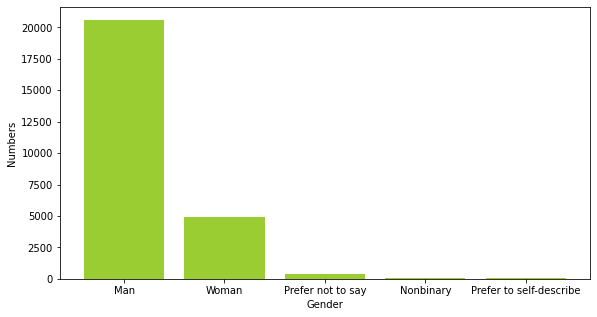

In [11]:
plt.figure(figsize=(9.5,5))
y = data1.Gender.value_counts()
x = y.index
visual_1 = plt.bar(x,y,color ="yellowgreen")
plt.xlabel('Gender')
plt.ylabel('Numbers')
plt.show()

# So we conclude that most of our participants are men 

# Explore the Ages

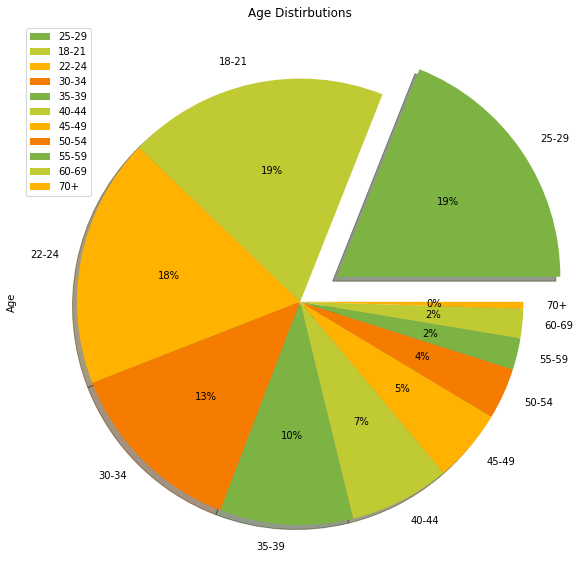

In [12]:
plt.figure(figsize=(10,12))
plt.style.use('seaborn-deep')
color = ['#7CB342','#C0CA33','#FFB300','#F57C00']
x = data1['Age'].value_counts()
x.plot(kind = 'pie',autopct = '%1.0f%%', colors=color, title = 'Age Distirbutions',shadow='true',explode = (0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0))
plt.legend(loc="upper left")
plt.show()

# we can found that the most age is between 18-29 with 38%

# Education Distributions

In [13]:
data1['Education'] = data1['Education'].replace({"Some college/university study without earning a bachelor’s degree":"Some university/college"})

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


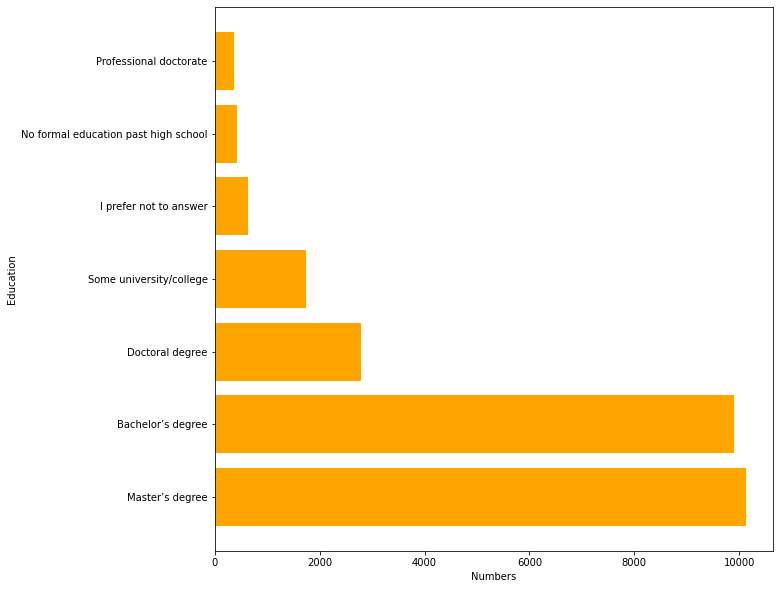

In [14]:
plt.figure(figsize=(10,10))
y = data1.Education.value_counts()
x = y.index
visual_2 = plt.barh(x, y, color='orange')
plt.xlabel('Numbers')
plt.ylabel('Education')
plt.style.use('dark_background')
plt.show()

We can conlude that most participant are have a master 

In [15]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


# Age and Gender Distributions Together

In [16]:
visual_1_grp = data1.groupby(['Age','Gender'])['Numbers'].sum().reset_index()
visual_1 = px.bar(data_frame=visual_1_grp, x='Gender', y='Numbers', color='Age',
                  barmode='group', title='Age and Gender distribution')
visual_1.show()

# From which countries people made the survey

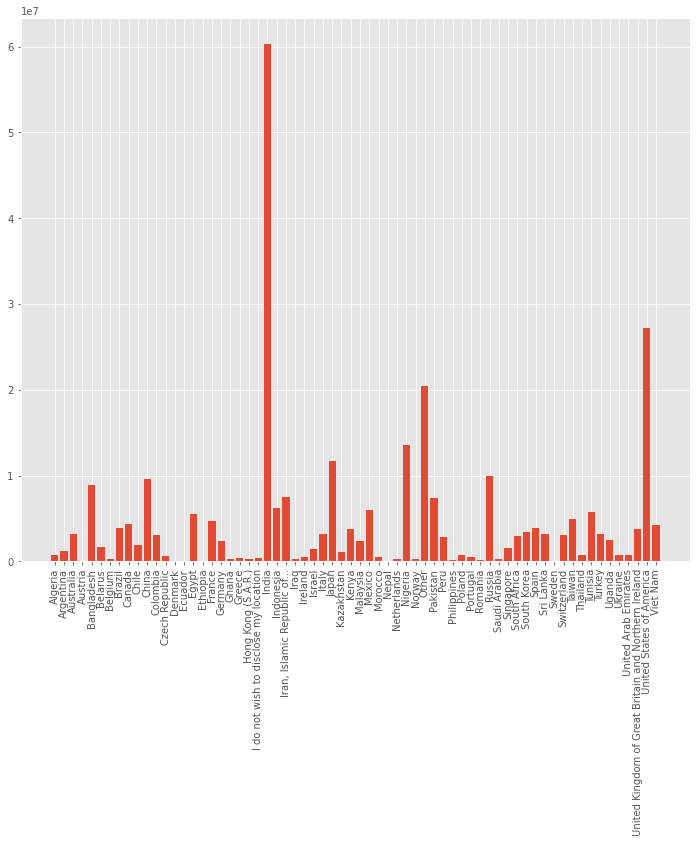

In [17]:
plt.style.use('ggplot')
plt.figure(figsize=(12,10))
y = data1.groupby('Country')['Numbers'].sum()
x = y.index
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

In [18]:
# same plot of the countries but with treemap for more elaboration 
plt.figure(figsize=(10,10))
visuals = data1[['Gender','Country']].value_counts().reset_index()
visual_2 = px.choropleth(visuals, locations='Country', color='Gender', locationmode='country names', title='Countries among gen', animation_frame='Gender')
visual_2.show()

<Figure size 720x720 with 0 Axes>

# So india and United State of America are the most two countires who contribute in this survey

# Create a plot to illustratte which Job among which Age for people who did the survey

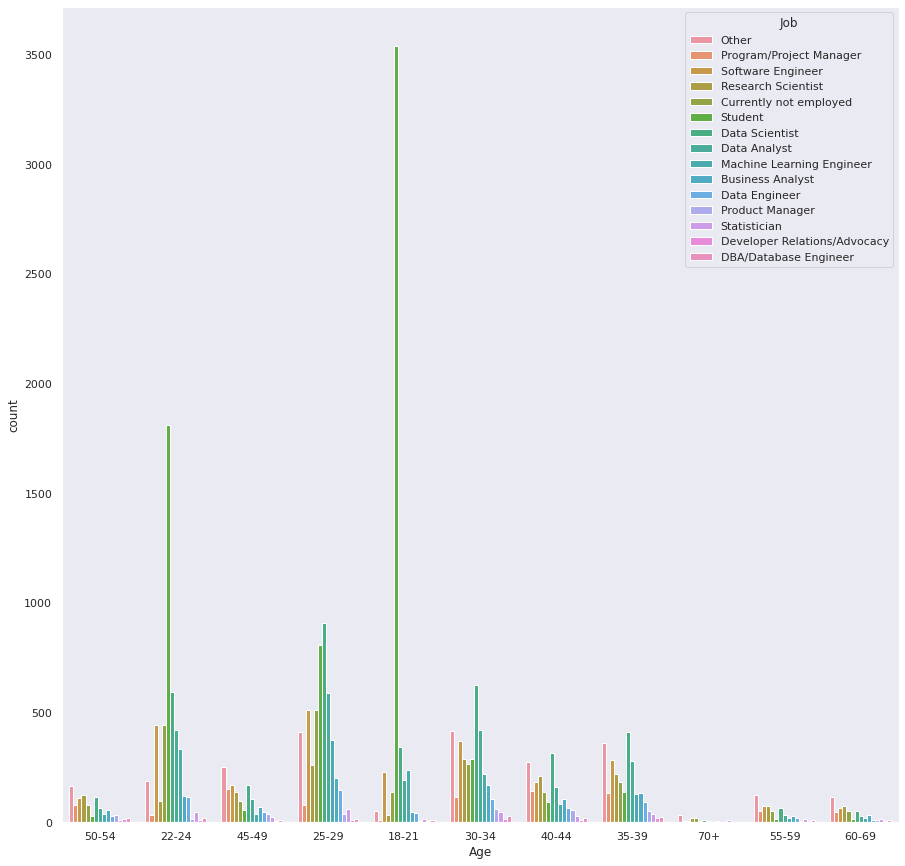

In [19]:
plt.figure(figsize=(15,15))
sns.set_theme(style="dark")
ax = sns.countplot(x=data1.Age, hue=data1.Job)

## so we can see that from 18 to 40 people are data scientist and data analyst but older people work in diffrenet jobs

# Invastigate the industries 

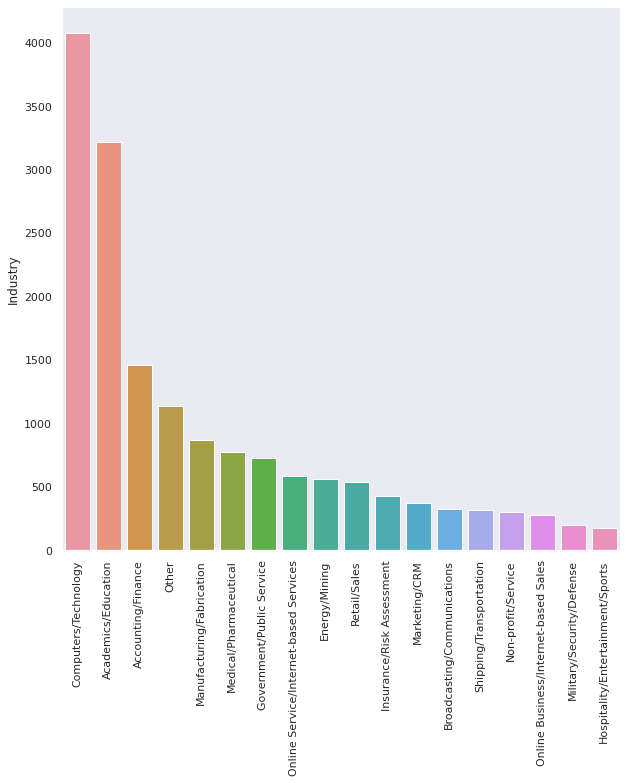

In [20]:
plt.figure(figsize=(10,10))
y = data1['Industry'].value_counts()
x = y.index
plt.xticks(rotation=90)
ax = sns.barplot(x = x,y = y )
sns.set_theme(style='dark')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



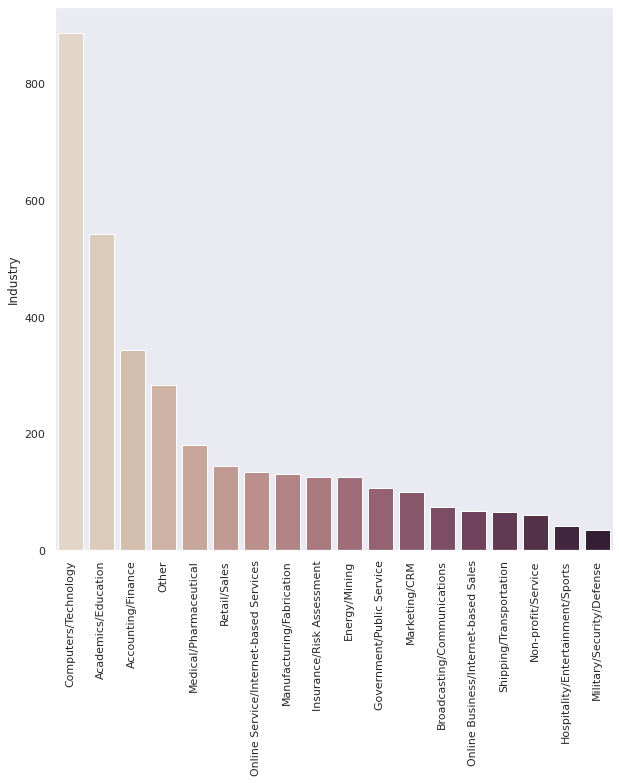

In [21]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
y = data1[data1['Job'] == 'Data Scientist']['Industry'].value_counts()
x = y.index
ax = sns.barplot(x,y,palette="ch:.25")

# Most Data Scientist work in (Technology, Academic, Accounting) industries.

# compare the Education among the job

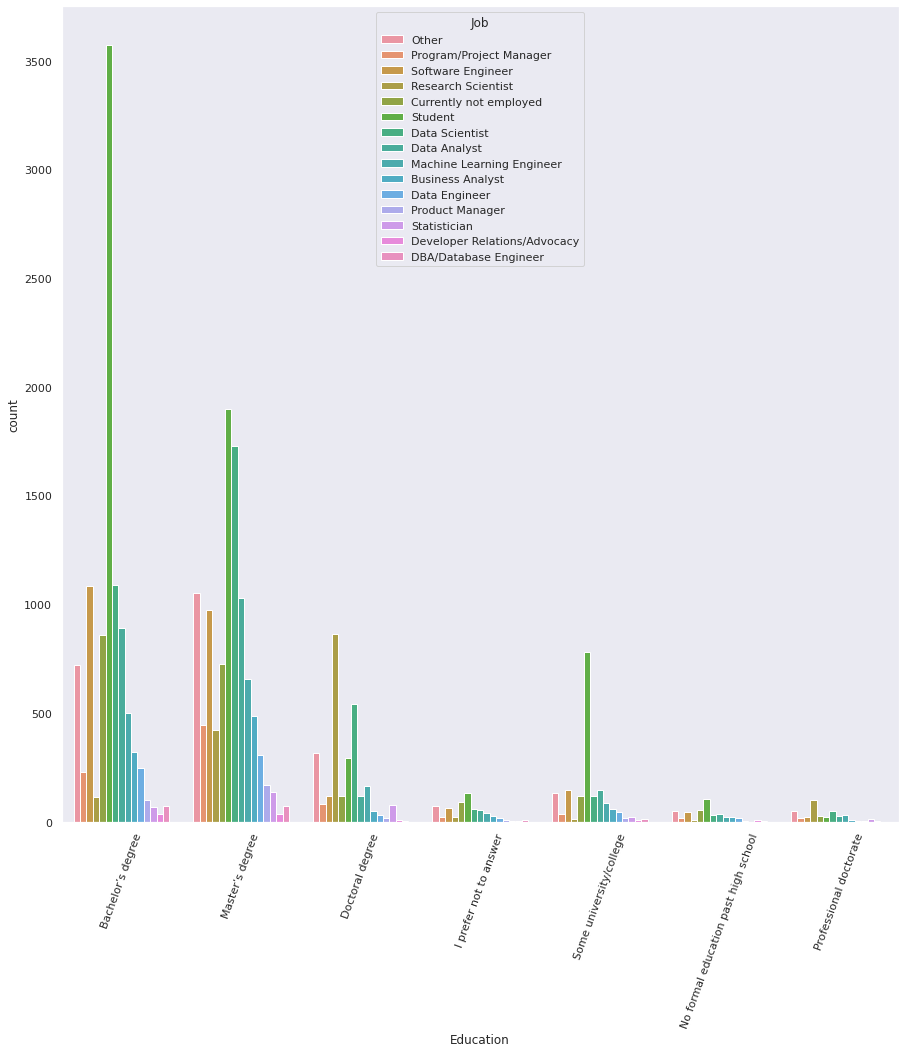

In [22]:
plt.figure(figsize=(15,15))
sns.set_theme(style="dark")
plt.xticks(rotation=70)
ax = sns.countplot(x=data1.Education, hue=data1.Job)

# So we discoveres that most of people have master degree are data scientist and most of have a Doctoral degree are data analysts and all most of people have bachelor degree are Software Engineers

# Most Jobs in 2021

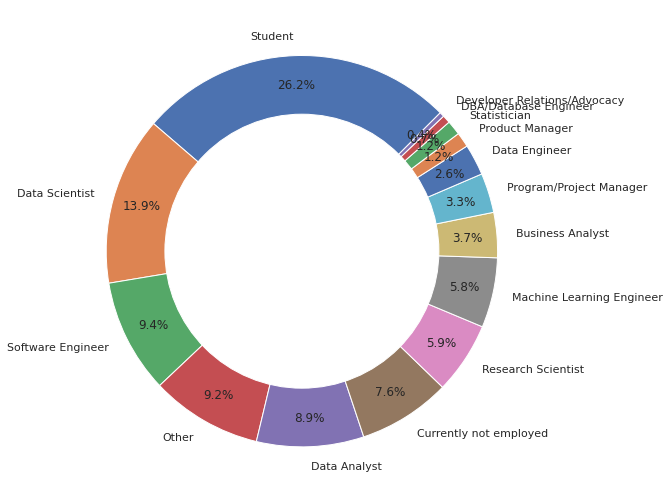

In [23]:
plt.figure(figsize=(9,9))
plt.style.use('seaborn-dark')
x = data1['Job'].value_counts()
plt.pie (x, labels = x.index , startangle=45, autopct='%1.1f%%',pctdistance=0.85)
my_circle=plt.Circle( (0,0), 0.7, color='white') # Adding circle at the centre
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# Most job in 2021 is Data Scientist

In [24]:
# function to select the column quickly
def col(q,c):
    x = []
    for i in range(1,c+1):
        st = f'Q{q}_Part_{i}'
        x.append(st)
    return x

In [25]:
part7 = col(7,12)

In [26]:
data2 = pd.read_csv('../input/kaggle-survey-2021/kaggle_survey_2021_responses.csv', skiprows=[1],
                    usecols= ['Q6','Q8','Q11','Q13','Q15'])
d = pd.read_csv('../input/kaggle-survey-2021/kaggle_survey_2021_responses.csv', skiprows=[1],
                    usecols=part7)

# Let's invastigate the experiance among the data 

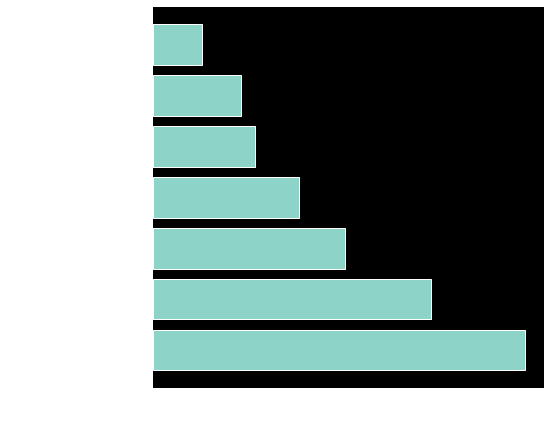

In [27]:
plt.figure(figsize=(7,7))
y = data2['Q6'].value_counts()
x = y.index
plt.style.use('dark_background')
plt.xticks(rotation=70)
plt.legend()

visual = plt.barh(x,y)


# Most Exprience are between 1 and 3 years 

In [28]:
# since i have alot of same column with many parts..
# This function will take the data and merge all columns in one column with number of occurence of the value
def merge(x,itr,no,string='None'):
    merged = {}
    for i in range(1,itr):
        merged.update(dict(x[f'Q{no}_Part_{i}'].value_counts()))
    merged1 = pd.DataFrame(merged.items(), columns = [string, 'counts'])
    return merged1
    

# Let's see the Programming and the recomended languages 

In [29]:
lang = merge(d,itr = 13,no = 7, string = 'Language')
lang

,Language,counts
0,Python,21860
1,R,5334
2,SQL,10756
3,C,4709
4,C++,5535
5,Java,4769
6,Javascript,4332
7,Julia,305
8,Swift,242
9,Bash,2216


# Which language kagglers used on regular basis ?

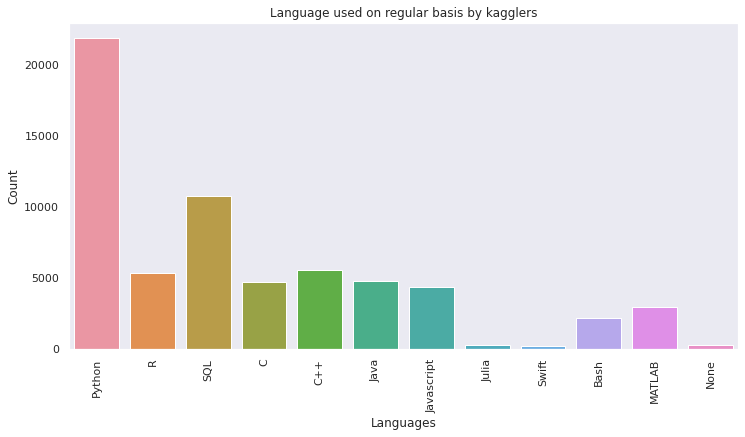

In [30]:
x=lang['Language']
y=lang['counts']
sns.set_theme(style="dark")
plots = sns.barplot(x = x, y = y)
plt.xticks(rotation = 90)
plt.xlabel("Languages")
plt.ylabel("Count")
plt.title("Language used on regular basis by kagglers")
plt.gcf().set_size_inches(12,6)
plt.show()

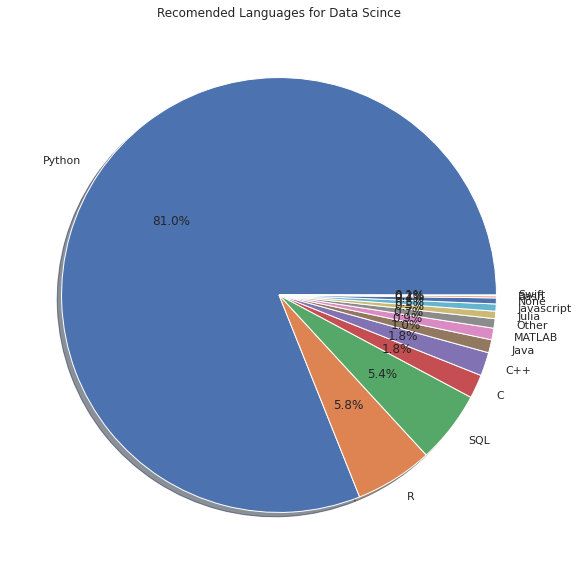

In [31]:
plt.figure(figsize=(10,10))
y = data2['Q8'].value_counts()
x = y.index
plt.title('Recomended Languages for Data Scince')
visual = plt.pie(y,labels=x,autopct = '%1.1f%%',shadow=True)


# we can see clearly that python is the most common language in data scince daily life and also the recommended language from them

# Hardware Data Scince Use for Their projects

In [32]:
data2['Q11'] = data2['Q11'].replace({'A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)':'Cloud',
                                     'A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)':'Dl Workstation'})

[Text(0.5, 0, 'Hardware')]

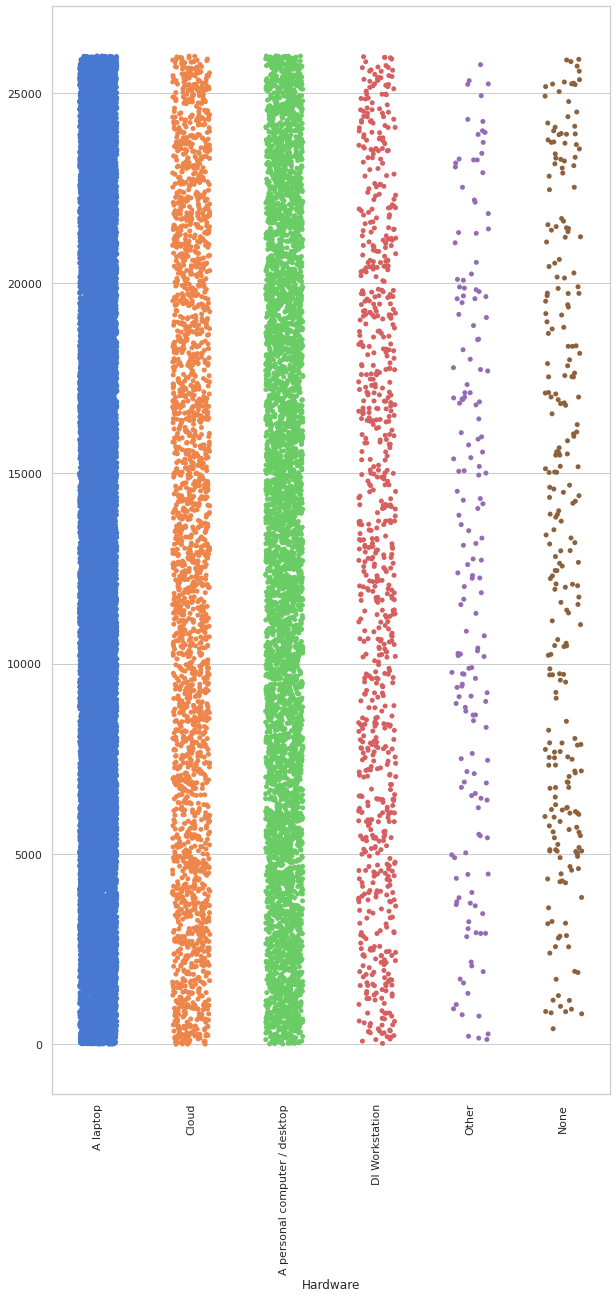

In [33]:
plt.figure(figsize=(10,20))
sns.set_theme(style="whitegrid", palette="muted")
y = data2['Q11']
x= y.index
ax = sns.stripplot(x=y, y=x, jitter=0.2)
plt.xticks(rotation=90)
ax.set(xlabel="Hardware")

# Clearly The Laptops is the most hardwar use 

# Is it TPU used frequently ?! 

[Text(0.5, 0, 'TPU')]

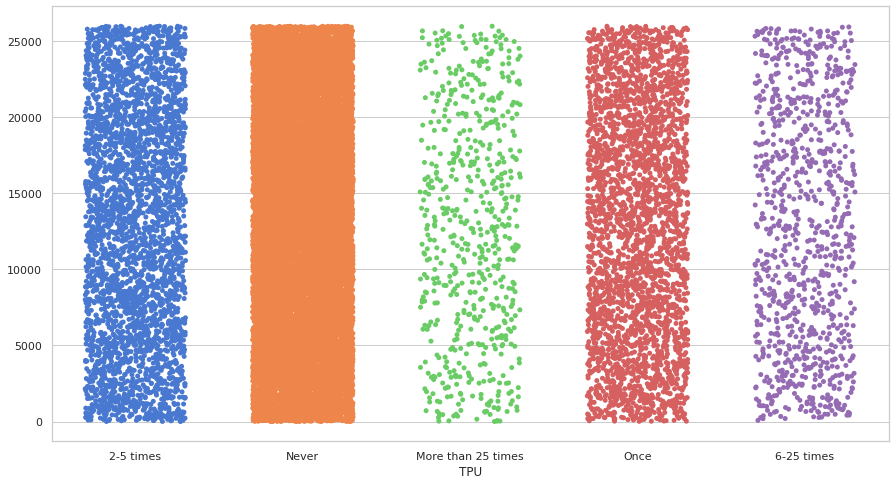

In [34]:
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid", palette="muted")
y = data2['Q13']
x= y.index
ax = sns.stripplot(x=y, y=x, jitter=0.3)
ax.set(xlabel="TPU")

# Clearly many people never used TPU

# Let's see experince with ML

In [35]:
data2['Q15'] = data2['Q15'].replace({'I do not use machine learning methods':'no experince'})

[Text(0.5, 0, 'ML Experiance')]

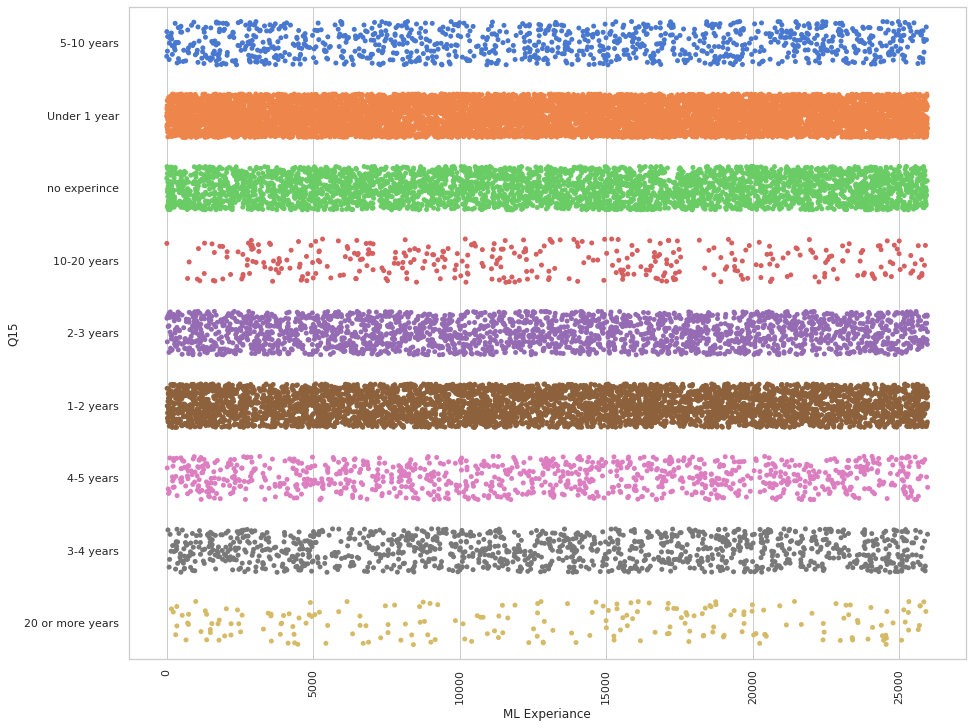

In [36]:
plt.figure(figsize=(15,12))
sns.set_theme(style="whitegrid", palette="muted")
y = data2['Q15']
x= y.index
ax = sns.stripplot(x=x, y=y, jitter=0.3)
plt.xticks(rotation=90)
ax.set(xlabel="ML Experiance")

# Integrated development environments (IDE's) used on a regular basis on kaggle in 2021?

In [37]:
part9 = col(9,12)
part10 = col(10,15)

In [38]:
datax = pd.read_csv('../input/kaggle-survey-2021/kaggle_survey_2021_responses.csv', skiprows=[1],
                    usecols= part9) 


In [39]:

datax.head(1)

,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_Part_12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vim / Emacs,NaN,NaN,NaN


In [40]:
data = merge(datax,itr = 12,no = 9,string='nn')
data

,nn,counts
0,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",5488
1,RStudio,4771
2,Visual Studio,4110
3,Visual Studio Code (VSCode),10040
4,PyCharm,7468
5,Spyder,3794
6,Notepad++,3937
7,Sublime Text,2839
8,Vim / Emacs,1646
9,MATLAB,2203


In [41]:
data['nn'] = data['nn'].replace({'Jupyter (JupyterLab, Jupyter Notebooks, etc) ':'Jupyter'})
data

,nn,counts
0,Jupyter,5488
1,RStudio,4771
2,Visual Studio,4110
3,Visual Studio Code (VSCode),10040
4,PyCharm,7468
5,Spyder,3794
6,Notepad++,3937
7,Sublime Text,2839
8,Vim / Emacs,1646
9,MATLAB,2203


# lets see what is the most platform get use 

[Text(0.5, 0, 'most used platforms')]

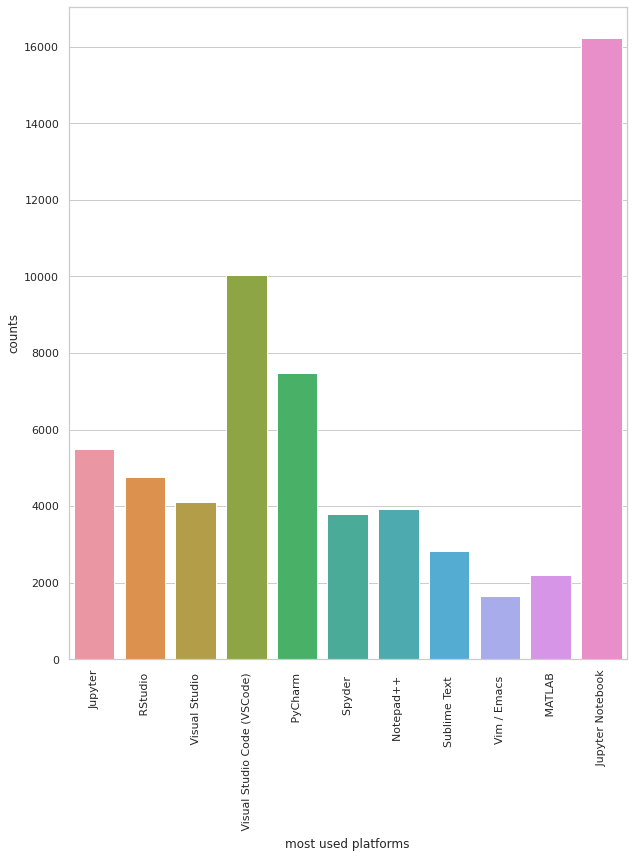

In [42]:
plt.figure(figsize=(10,12))
sns.set_theme(style="whitegrid", palette="muted")
y = data['counts']
x= data['nn']
ax = sns.barplot(x=x, y=y)
plt.xticks(rotation=90)
ax.set(xlabel="most used platforms")

# most used platform are jupyter notebook

In [43]:
data3 = pd.read_csv('../input/kaggle-survey-2021/kaggle_survey_2021_responses.csv', skiprows=[1],
                    usecols= part10)

In [44]:

dataa = merge(data3,itr=15,no=10,string='s')
dataa

,s,counts
0,Kaggle Notebooks,9507
1,Colab Notebooks,9792
2,Azure Notebooks,1062
3,Paperspace / Gradient,209
4,Binder / JupyterHub,1770
5,Code Ocean,175
6,IBM Watson Studio,1067
7,Amazon Sagemaker Studio Notebooks,753
8,Amazon EMR Notebooks,348
9,Google Cloud Notebooks (AI Platform / Vertex AI),2051


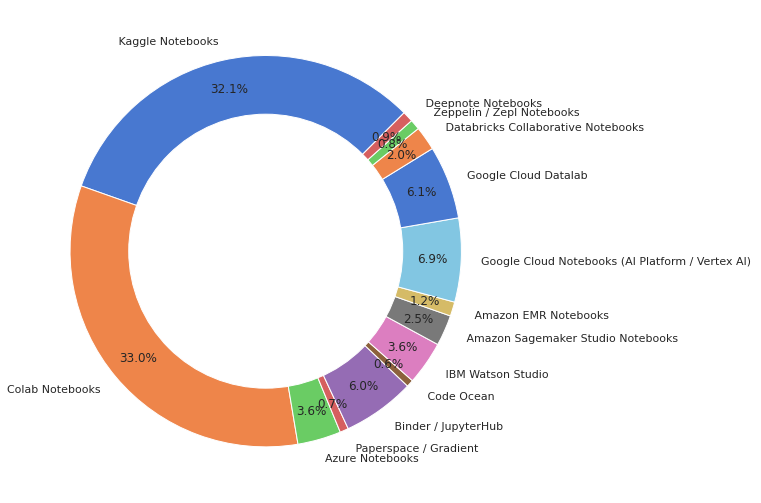

In [45]:
plt.figure(figsize=(9,9))
plt.style.use('seaborn-dark')
x = dataa['counts']
plt.pie (x, labels = dataa['s'] , startangle=45, autopct='%1.1f%%',pctdistance=0.85)
my_circle=plt.Circle( (0,0), 0.7, color='white') # Adding circle at the centre
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# colab Notebook and kaggle Notebook are the most used products

In [46]:
part_12 = col(12,5)

In [47]:
data4 = pd.read_csv('../input/kaggle-survey-2021/kaggle_survey_2021_responses.csv', skiprows=[1],
                    usecols= part_12)
data4

,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5
0,NaN,Google Cloud TPUs,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,None
2,NaN,NaN,NaN,NaN,NaN
3,NVIDIA GPUs,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...
25968,NVIDIA GPUs,NaN,NaN,NaN,NaN
25969,NaN,NaN,NaN,NaN,None
25970,NaN,NaN,NaN,NaN,NaN
25971,NaN,NaN,NaN,NaN,None


# which hardware are the most used 

In [48]:
data = merge(data4,5,no=12,string='hardware')
data

,hardware,counts
0,NVIDIA GPUs,8036
1,Google Cloud TPUs,3451
2,AWS Trainium Chips,414
3,AWS Inferentia Chips,416


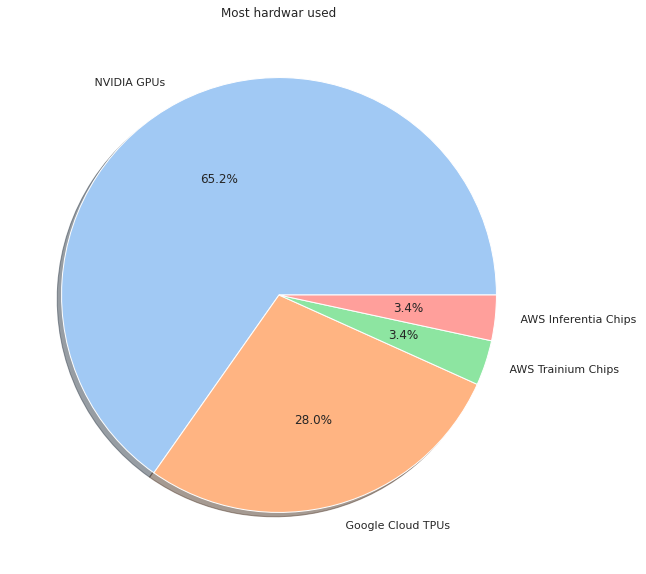

In [49]:
plt.figure(figsize=(10,10))
y = data['counts']
x = data['hardware']
plt.title('Most hardwar used')
colors = sns.color_palette('pastel')[0:5]
visual = plt.pie(y,labels=x,autopct = '%1.1f%%', colors=colors,shadow=True)


# Which data visualization libraries or tools are mostly used?

In [50]:
part_14 = col(14,11)

In [51]:
data5 = pd.read_csv('../input/kaggle-survey-2021/kaggle_survey_2021_responses.csv', skiprows=[1],
                    usecols= part_14)

In [52]:
data = merge(data5,itr=11,no=14,string='Libraries')
data

,Libraries,counts
0,Matplotlib,17595
1,Seaborn,12586
2,Plotly / Plotly Express,5778
3,Ggplot / ggplot2,5100
4,Shiny,1322
5,D3 js,978
6,Altair,309
7,Bokeh,1050
8,Geoplotlib,1148
9,Leaflet / Folium,716


[Text(0.5, 0, 'most used libraries')]

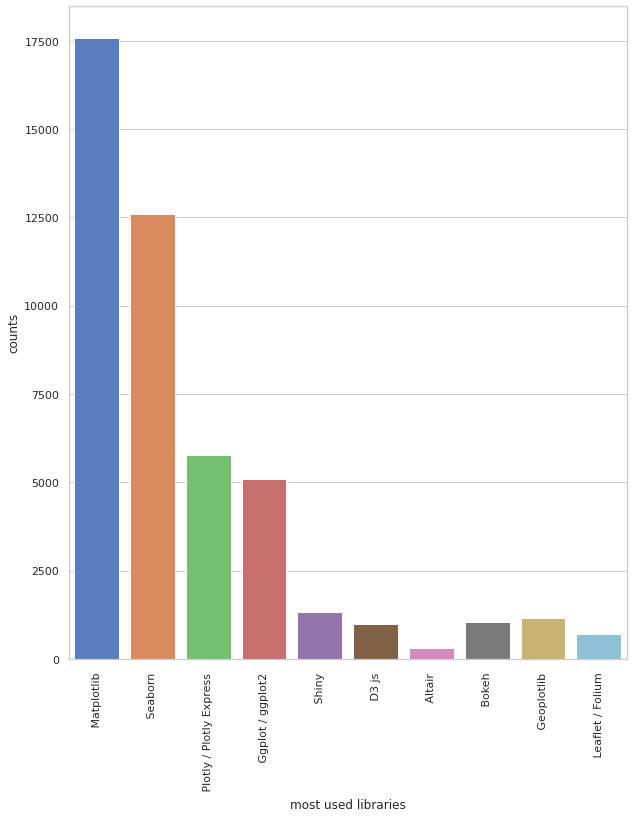

In [53]:
plt.figure(figsize=(10,12))
sns.set_theme(style="whitegrid", palette="muted")
y = data['counts']
x= data['Libraries']
ax = sns.barplot(x=x, y=y)
plt.xticks(rotation=90)
ax.set(xlabel="most used libraries")

# so matplotlib is the most used library

In [54]:
data_6 = pd.read_csv('../input/kaggle-survey-2021/kaggle_survey_2021_responses.csv', skiprows=[1],
                    usecols= ['Q21','Q22','Q23'])

# let's see how many people responsible for data science work loads 

In [55]:
by=['0','1-2','3-4','5-9','10-15','15-19','20+']
x = data_6.sort_values(by=['Q22'])['Q22']
x = x.dropna()

<AxesSubplot:>

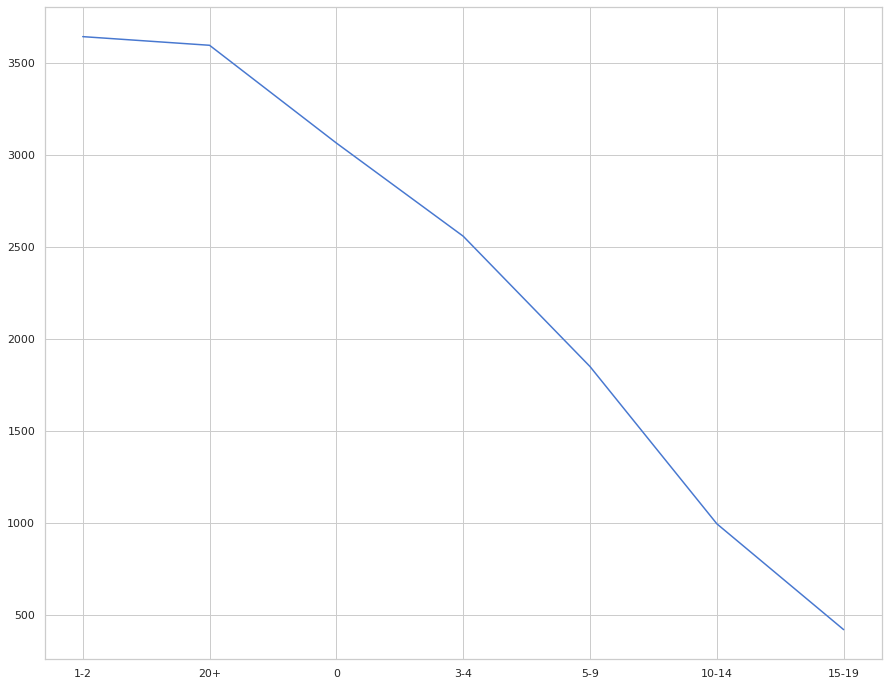

In [56]:
plt.figure(figsize=(15,12))
y = x.value_counts()
y.plot(kind='line')

# the data shows that more than 3.5k said that their company have only 1-2 employee work in data scince field however more than 3.5k said that their company have more than 20+ empolyees work in data scince

In [57]:
data_6['Q23'] = data_6['Q23'].replace({'No (we do not use ML methods)':'No',
                                       'We use ML methods for generating insights (but do not put working models into production)':'For insights only',
                                      'We recently started using ML methods (i.e., models in production for less than 2 years)':'yes, but less than 2 years',
                                      'We are exploring ML methods (and may one day put a model into production)':'We still exploring it',
                                      'We have well established ML methods (i.e., models in production for more than 2 years)':'yes'})

In [58]:
data_6['Q23'].value_counts().reset_index()

,index,Q23
0,We still exploring it,3390
1,No,3263
2,I do not know,2712
3,yes,2633
4,"yes, but less than 2 years",2247
5,For insights only,1707


# let's explore the spread of ML among the participants  

[Text(0.5, 0, 'ML Experiance')]

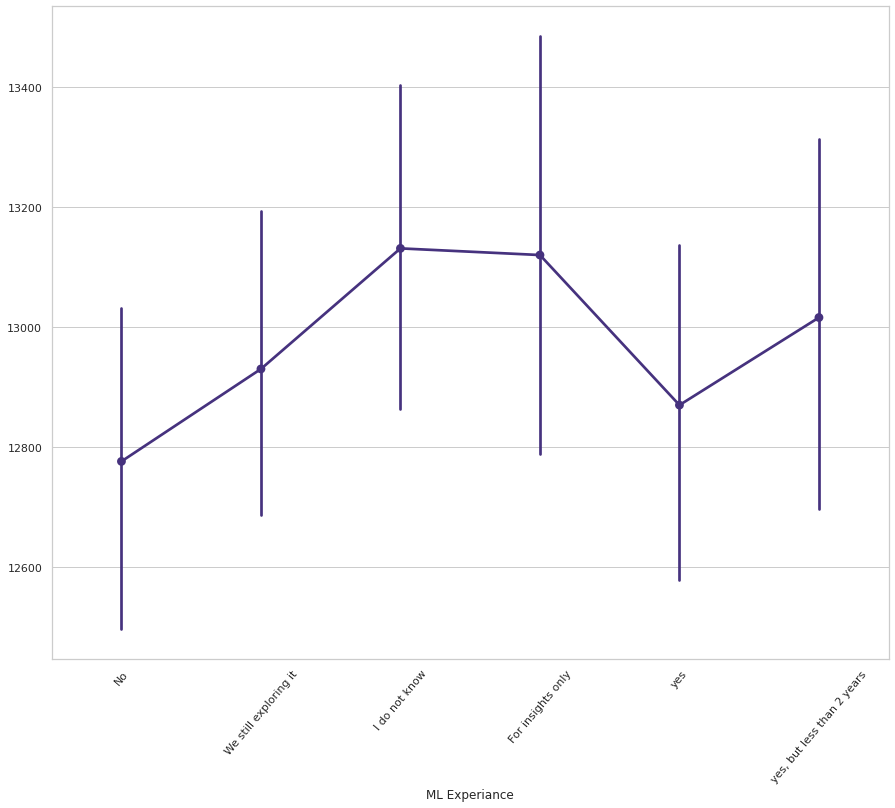

In [59]:
plt.figure(figsize=(15,12))
sns.set_theme(style="whitegrid", palette='viridis')
y = data_6['Q23']
x= y.index
ax = sns.pointplot(x=y, y=x)
plt.xticks(rotation=50)
ax.set(xlabel="ML Experiance")

# The data indicates that most of our participants are still didn't start to use ML but they start to exploring it and use it in insights. 

In [60]:
data1.Industry
data_6['Q22']

0        3-4
1        1-2
2          0
3          0
4        5-9
        ... 
25968    20+
25969    NaN
25970    20+
25971    20+
25972      0
Name: Q22, Length: 25973, dtype: object

In [61]:
#plt.figure(figsize=(20,15))
#sns.set_theme(style="dark")
#ax = sns.countplot(x=data_6['Q22'],hue=data1['Industry'])
#ax.set(xlabel="No. of employees")
#plt.title('The Number of employees in data scince among industries')

Text(0.5, 1.0, 'The Number of employees in data scince among industries')

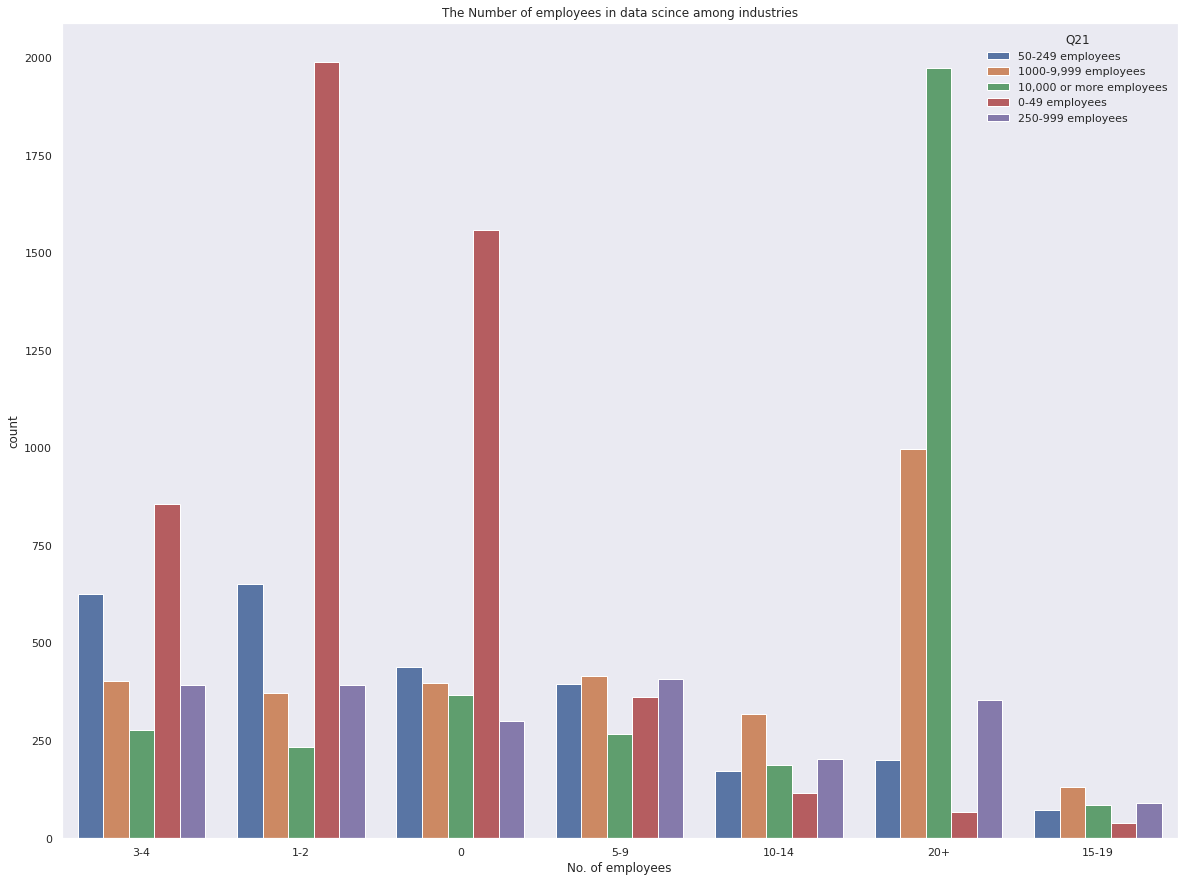

In [62]:
plt.figure(figsize=(20,15))
sns.set_theme(style="dark")
ax = sns.countplot(x=data_6['Q22'],hue=data_6['Q21'])
ax.set(xlabel="No. of employees")
plt.title('The Number of employees in data scince among industries')

# So now we can see that the data scince role depend on the size of the company
# - the company with 50 employees have just 1 or 2 data scientist but 1000+ employees comany has 20+ data scientist


# let's invastigate the salary distributions and the amount of money spent on ML

In [63]:
data_final = data5 = pd.read_csv('../input/kaggle-survey-2021/kaggle_survey_2021_responses.csv', skiprows=[1],
                    usecols=['Q25','Q26','Q28'])

In [64]:
data_final['Q26'].value_counts()

$0 ($USD)                  5903
$100-$999                  2534
$1000-$9,999               2491
$1-$99                     1929
$10,000-$99,999            1309
$100,000 or more ($USD)    1017
Name: Q26, dtype: int64

In [65]:
data_final['Q26'] = data_final['Q26'].replace({'$100,000 or more ($USD)':'+ $1000,000'})

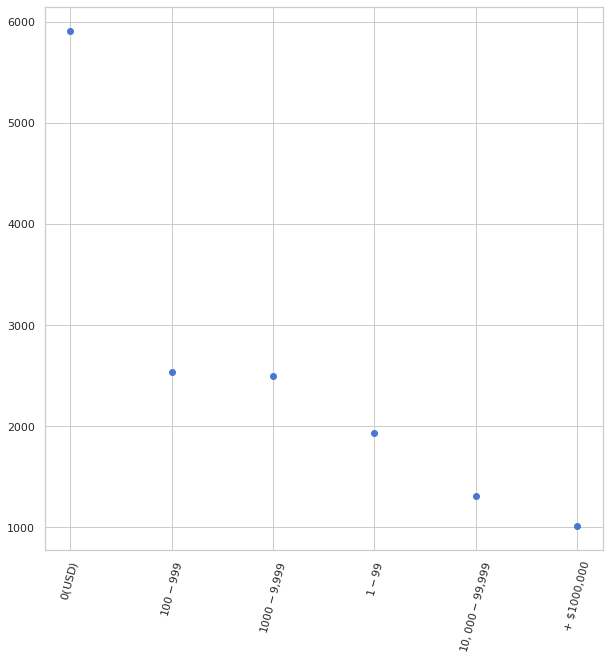

In [66]:
plt.figure(figsize=(10,10))
sns.set_theme(style="whitegrid", palette="muted")
y = data_final['Q26'].value_counts()
plt.xticks(rotation=75)
x= y.index
ax = plt.scatter(x=x, y=y)


# clearly there's alot of organization didn't start to spent money on machine learning

# Most enjoyable cloud computing platform

In [67]:
data_final1 = data_final[data_final['Q28'] != 'They all had a similarly enjoyable developer experience']

In [68]:
data_final1['Q28'].value_counts().reset_index()

,index,Q28
0,Amazon Web Services (AWS),836
1,Google Cloud Platform (GCP),738
2,Microsoft Azure,454
3,None were satisfactory,95
4,IBM Cloud / Red Hat,83
5,Oracle Cloud,60
6,Alibaba Cloud,34
7,Other,31
8,VMware Cloud,30
9,SAP Cloud,23


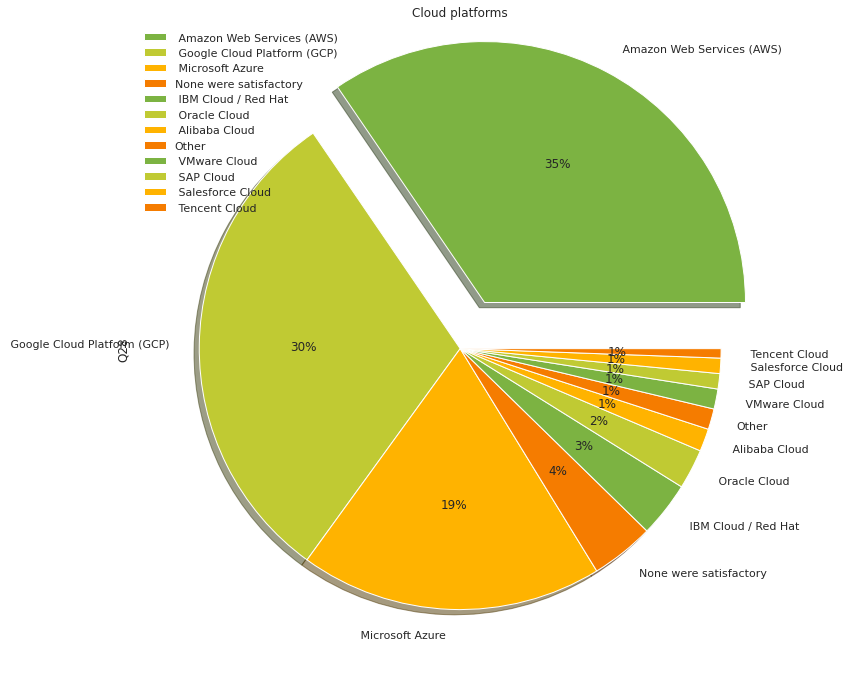

In [69]:
plt.figure(figsize=(15,12))
plt.style.use('seaborn-deep')
color = ['#7CB342','#C0CA33','#FFB300','#F57C00']
x = data_final1['Q28'].value_counts()
x.plot(kind = 'pie',autopct = '%1.0f%%', colors=color, title = 'Cloud platforms',shadow='true',explode = (0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0))
plt.legend(loc="upper left")
plt.show()